<a href="https://colab.research.google.com/github/SnehaTanwar006/Linear_regression_02/blob/main/LR_MF_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np    # it is an unofficial standard to use np for numpy
import time

**Using a for loop**, implement a function which returns the dot product of two vectors. The function to return given inputs $a$ and $b$:
$$ x = \sum_{i=0}^{n-1} a_i b_i $$
Assume both `a` and `b` are the same shape.

In [ ]:
def my_dot(a, b):

    x=0
    for i in range(a.shape[0]):
        x = x + a[i] * b[i]
    return x

In [ ]:
# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
print(f"my_dot(a, b) = {my_dot(a, b)}")

my_dot(a, b) = 24


In [ ]:
# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
c = np.dot(a, b)
print(f"NumPy 1-D np.dot(a, b) = {c}, np.dot(a, b).shape = {c.shape} ")
c = np.dot(b, a)
print(f"NumPy 1-D np.dot(b, a) = {c}, np.dot(a, b).shape = {c.shape} ")


NumPy 1-D np.dot(a, b) = 24, np.dot(a, b).shape = () 
NumPy 1-D np.dot(b, a) = 24, np.dot(a, b).shape = () 


In [ ]:
np.random.seed(1)
a = np.random.rand(10000000)  # very large arrays
b = np.random.rand(10000000)

tic = time.time()  # capture start time
c = np.dot(a, b)
toc = time.time()  # capture end time

print(f"np.dot(a, b) =  {c:.4f}")
print(f"Vectorized version duration: {1000*(toc-tic):.4f} ms ")

tic = time.time()  # capture start time
c = my_dot(a,b)
toc = time.time()  # capture end time

print(f"my_dot(a, b) =  {c:.4f}")
print(f"loop version duration: {1000*(toc-tic):.4f} ms ")

del(a);del(b)  #remove these big arrays from memory

np.dot(a, b) =  2501072.5817
Vectorized version duration: 12.2478 ms 
my_dot(a, b) =  2501072.5817
loop version duration: 3605.3522 ms 


# Multiple Variable Linear Regression



In [ ]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays, round and display them with 2 digits after the decimal point

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (10k INR)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses.

**For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.**

In [ ]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [ ]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


In [ ]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [ ]:
def predict_single_loop(x, w, b):

    n = x.shape[0] # This line should be indented correctly
    p = 0

    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i

    p = p + b

    return p

In [ ]:
# get a row from our training data
x_vec = X_train[0,:] # first row, all columns (i.e., all features)
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


In [ ]:
def predict(x, w, b):

    p = np.dot(x, w) + b
    return p

In [ ]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


In [ ]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar
    return cost

In [ ]:
# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


In [ ]:
def compute_gradient(X, y, w, b):

    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [ ]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

In [ ]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
#iterations = 1234
#iterations = 9
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


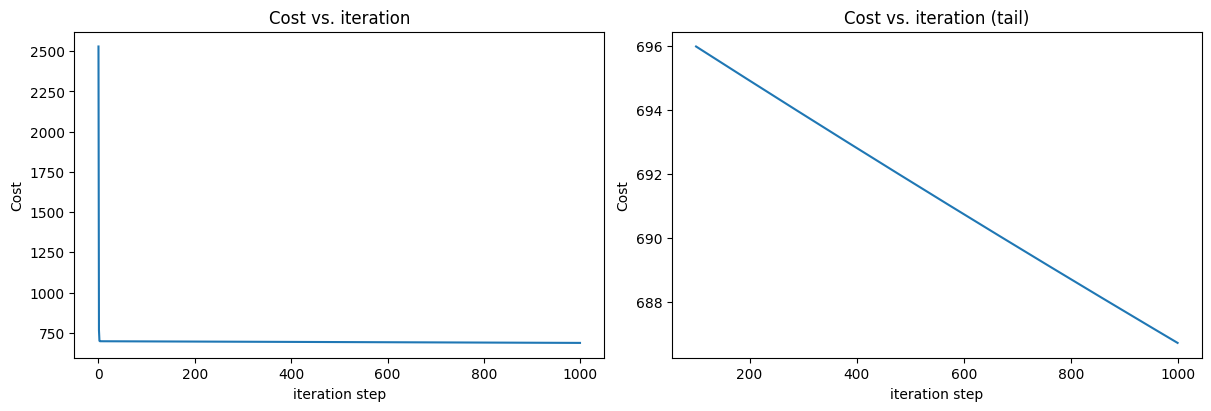

In [ ]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

# Learning Rate & Feature scaling (Multi-variable)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

from scipy.stats import norm

In [ ]:
# load the dataset
data = np.loadtxt("./houses.txt", delimiter=',', skiprows=1)
#data = np.loadtxt("./houses.txt", delimiter=',', skiprows=0)
X = data[:,:4]  # All rows, columns 0 to 3 (features)
y = data[:,4]   # All rows, column 4 (target variable)
X_train=X
y_train = y

X_features = ['size(sqft)','bedrooms','floors','age'] # Creates a list of feature names to describe what each column in X represents.
                                                      # This is helpful for labeling axes, plotting, or printing readable results.

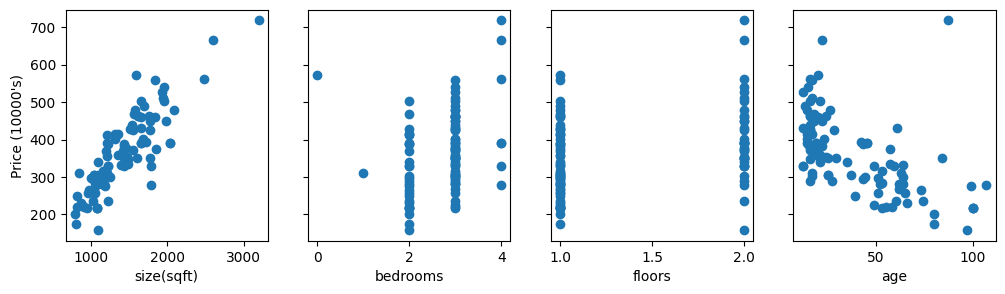

In [ ]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (10000's)")
plt.show()

In [ ]:
def compute_gradient_matrix(X, y, w, b):

    m,n = X.shape
    f_wb = X @ w + b    # matrix multiplication operator (dot product)
    e   = f_wb - y
    dj_dw  = (1/m) * (X.T @ e)
    dj_db  = (1/m) * np.sum(e)

    return dj_db,dj_dw

In [ ]:
def compute_cost_matrix(X, y, w, b, verbose=False): # verbose: Optional flag — if True, prints debug info (default is False)
# def compute_cost_matrix(X, y, w, b, verbose=True):

    m,n = X.shape

    # calculate f_wb for all examples.
    f_wb = X @ w + b
    # calculate cost
    total_cost = (1/(2*m)) * np.sum((f_wb-y)**2)

    if verbose: print("f_wb:")
    if verbose: print(f_wb)

    return total_cost

In [ ]:
def compute_gradient(X, y, w, b):

    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_db,dj_dw

In [ ]:
def gradient_descent_houses(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):


    # number of training examples
    m = len(X)

    # An array to store values at each iteration primarily for graphing later
    hist={} # dictionary
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[];

    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    save_interval = np.ceil(num_iters/10000) # prevent resource exhaustion for long runs

    print(f"Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:
            hist["cost"].append(cost_function(X, y, w, b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")

    return w, b, hist #return w,b and history for graphing




In [ ]:
def run_gradient_descent(X,y,iterations=1000, alpha = 1e-6):

    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent_houses(X ,y, initial_w, initial_b,
                                               compute_cost, compute_gradient_matrix, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.2f}")

    return(w_out, b_out, hist_out)

In [ ]:
#set alpha to 9.9e-7
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha = 9.9e-7) # _ means "ignore this return value", So only the third return value (hist) is saved


Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

In [ ]:
def plot_cost_i_w(X,y,hist):
    ws = np.array([ p[0] for p in hist["params"]])
    rng = max(abs(ws[:,0].min()),abs(ws[:,0].max()))
    wr = np.linspace(-rng+0.27,rng+0.27,20)
    cst = [compute_cost(X,y,np.array([wr[i],-32, -67, -1.46]), 221) for i in range(len(wr))]

    fig,ax = plt.subplots(1,2,figsize=(12,3))
    ax[0].plot(hist["iter"], (hist["cost"]));  ax[0].set_title("Cost vs Iteration")
    ax[0].set_xlabel("iteration"); ax[0].set_ylabel("Cost")
    ax[1].plot(wr, cst); ax[1].set_title("Cost vs w[0]")
    ax[1].set_xlabel("w[0]"); ax[1].set_ylabel("Cost")
    ax[1].plot(ws[:,0],hist["cost"])
    plt.show()

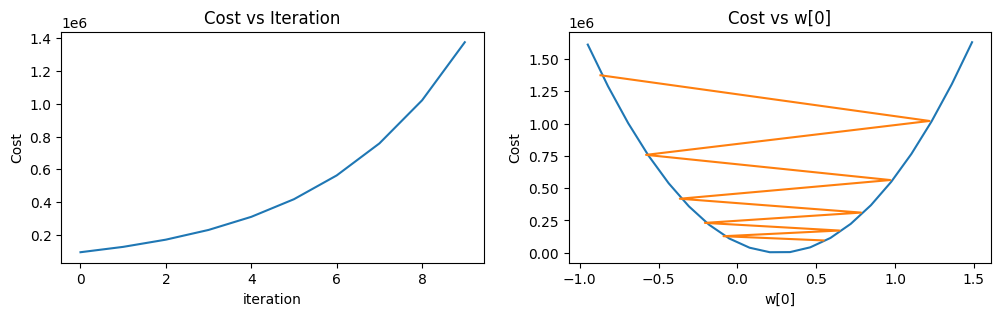

In [ ]:
plot_cost_i_w(X_train, y_train, hist)

In [ ]:
#set alpha to 9e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

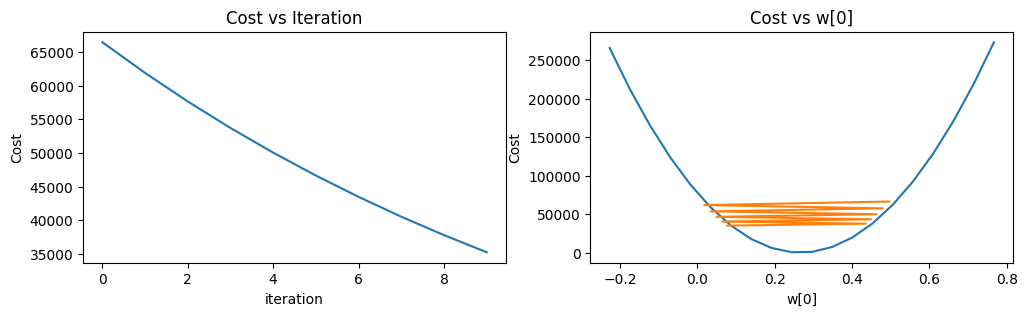

In [ ]:
plot_cost_i_w(X_train, y_train, hist)

In [ ]:
#set alpha to 1e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

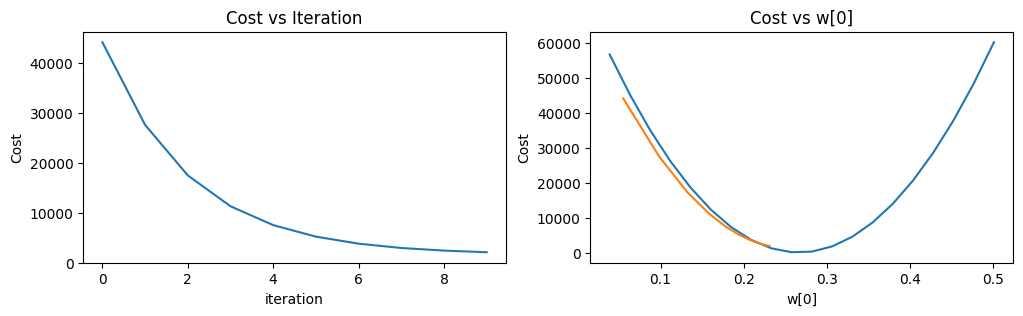

In [ ]:
plot_cost_i_w(X_train,y_train,hist)

## Feature Scaling


### z-score normalization
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

In [ ]:
def zscore_normalize_features(X):

    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)


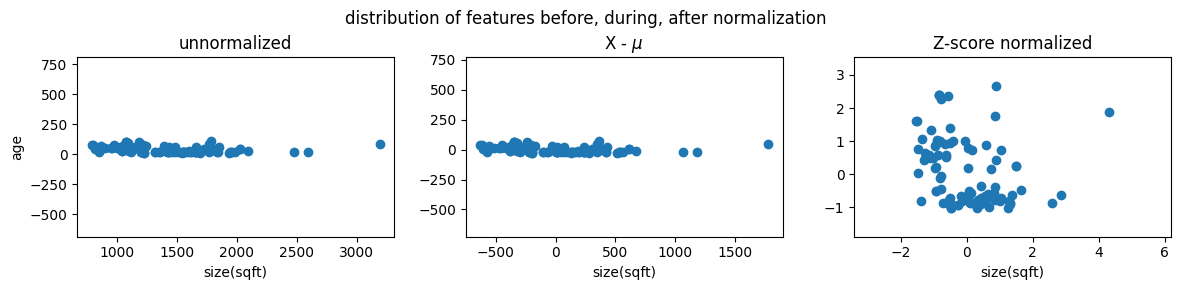

In [ ]:
mu     = np.mean(X_train,axis=0)
sigma  = np.std(X_train,axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [ ]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma = [411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


In [ ]:
def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data))*0.2
    x = np.linspace(np.min(data)-scale,np.max(data)+scale,50)
    _,bins, _ = ax.hist(data, x, color="xkcd:azure")
    #ax.set_ylabel("Count")

    mu = np.mean(data);
    std = np.std(data);
    dist = norm.pdf(bins, loc=mu, scale = std)

    axr = ax.twinx()
    axr.plot(bins,dist, color = "orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

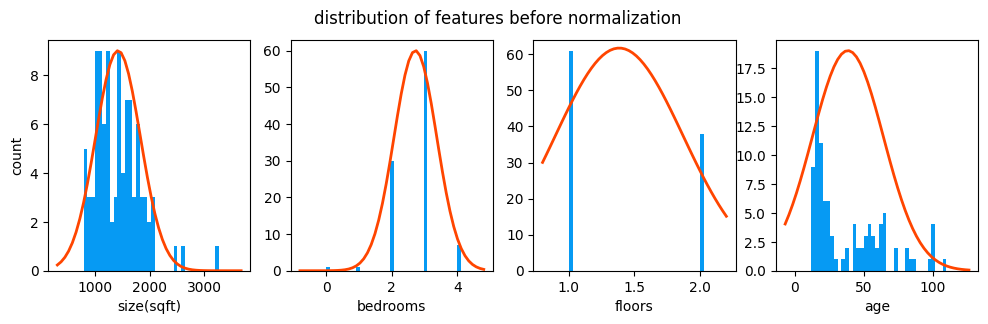

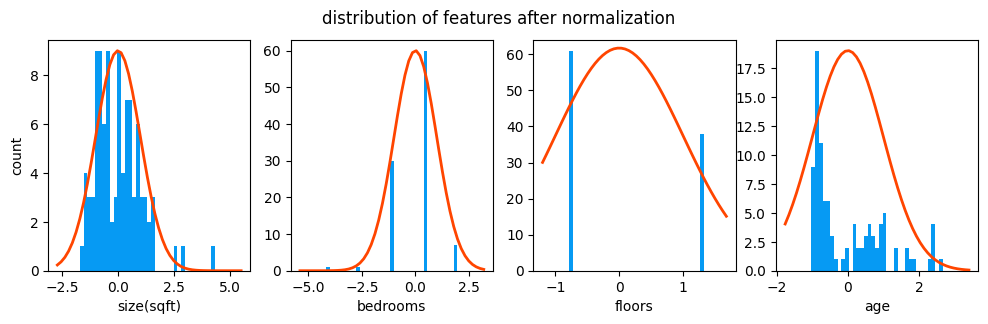

In [ ]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features after normalization")

plt.show()

In [ ]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.6e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

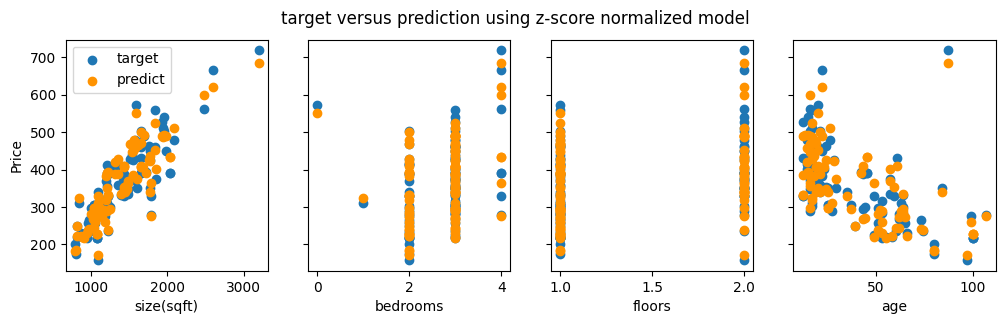

In [ ]:
#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm
# Define the color range
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
# plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [ ]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = INR {x_house_predict*10000:0.0f}")

[-0.53  0.43 -0.79  0.06]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = INR 3187091


In [ ]:
def plt_contour_multi(x, y, w, b, ax, prange, p1, p2, title="", xlabel="", ylabel=""):
    contours = [1e2, 2e2,3e2,4e2, 5e2, 6e2, 7e2,8e2,1e3, 1.25e3,1.5e3, 1e4, 1e5, 1e6, 1e7]
    px,py = np.meshgrid(np.linspace(*(prange[p1])),np.linspace(*(prange[p2])))
    z=np.zeros_like(px)
    n,_ = px.shape
    for i in range(px.shape[0]):
        for j in range(px.shape[1]):
            w_ij = w
            b_ij = b
            if p1 <= 3: w_ij[p1] = px[i,j]
            if p1 == 4: b_ij = px[i,j]
            if p2 <= 3: w_ij[p2] = py[i,j]
            if p2 == 4: b_ij = py[i,j]

            z[i][j] = compute_cost(x, y, w_ij, b_ij )
    dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0';
    CS = ax.contour(px, py, z, contours, linewidths=2,
                   colors=[dlblue, dlorange, dldarkred, dlmagenta, dlpurple])
    ax.clabel(CS, inline=1, fmt='%1.2e', fontsize=10)
    ax.set_xlabel(xlabel);  ax.set_ylabel(ylabel)
    ax.set_title(title, fontsize=14)

In [ ]:
def plt_equal_scale(X_train, X_norm, y_train):
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    prange = [
              [ 0.238-0.045, 0.238+0.045,  50],
              [-25.77326319-0.045, -25.77326319+0.045, 50],
              [-50000, 0,      50],
              [-1500,  0,      50],
              [0, 200000, 50]]
    w_best = np.array([0.23844318, -25.77326319, -58.11084634,  -1.57727192])
    b_best = 235
    plt_contour_multi(X_train, y_train, w_best, b_best, ax[0], prange, 0, 1,
                      title='Unnormalized, J(w,b), vs w[0],w[1]',
                      xlabel= "w[0] (size(sqft))", ylabel="w[1] (# bedrooms)")
    #
    w_best = np.array([111.1972, -16.75480051, -28.51530411, -37.17305735])
    b_best = 376.949151515151
    prange = [[ 111-50, 111+50,   75],
              [-16.75-50,-16.75+50, 75],
              [-28.5-8, -28.5+8,  50],
              [-37.1-16,-37.1+16, 50],
              [376-150, 376+150, 50]]
    plt_contour_multi(X_norm, y_train, w_best, b_best, ax[1], prange, 0, 1,
                      title='Normalized, J(w,b), vs w[0],w[1]',
                      xlabel= "w[0] (normalized size(sqft))", ylabel="w[1] (normalized # bedrooms)")
    fig.suptitle("Cost contour with equal scale", fontsize=18)
    #plt.tight_layout(rect=(0,0,1.05,1.05))
    fig.tight_layout(rect=(0,0,1,0.95))
    plt.show()

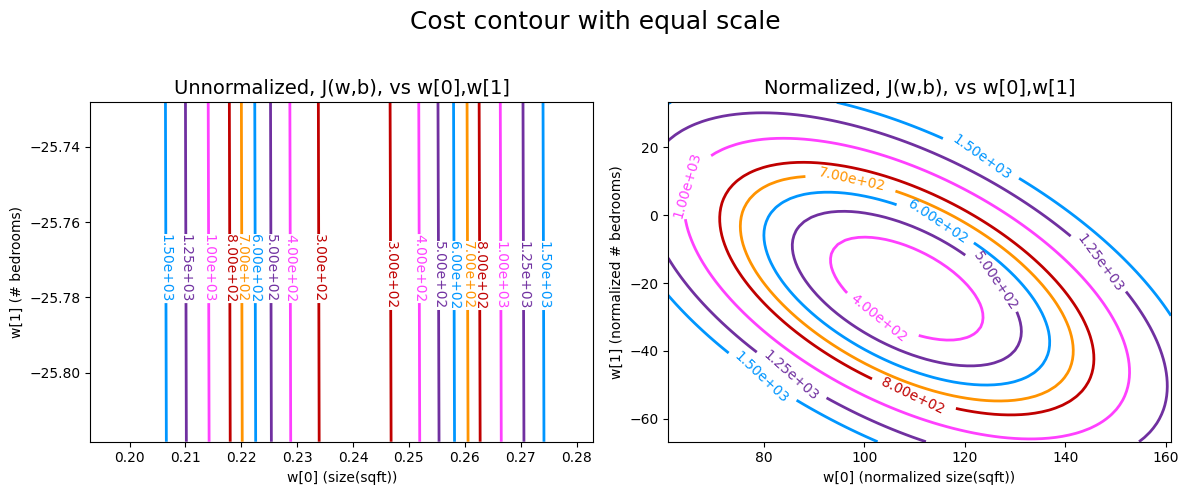

In [ ]:
plt_equal_scale(X_train, X_norm, y_train)

# Polynomial Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [ ]:
def run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-6):
    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent(X ,y, initial_w, initial_b,
                                               compute_cost, compute_gradient_matrix, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")

    return(w_out, b_out)

Iteration    0: Cost  1657.56   
Iteration  100: Cost   694.55   
Iteration  200: Cost   588.48   
Iteration  300: Cost   526.41   
Iteration  400: Cost   490.10   
Iteration  500: Cost   468.86   
Iteration  600: Cost   456.43   
Iteration  700: Cost   449.16   
Iteration  800: Cost   444.90   
Iteration  900: Cost   442.41   
w,b found by gradient descent: w: [18.7], b: -52.0834


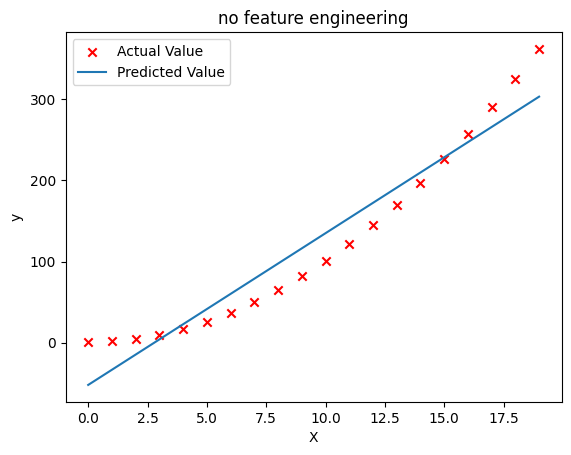

In [ ]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

model_w, model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-2)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

In [ ]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features
X = x**2      #<-- added engineered feature

Iteration    0: Cost  7329.22   
Iteration 1000: Cost     0.22   
Iteration 2000: Cost     0.22   
Iteration 3000: Cost     0.22   
Iteration 4000: Cost     0.22   
Iteration 5000: Cost     0.22   
Iteration 6000: Cost     0.21   
Iteration 7000: Cost     0.21   
Iteration 8000: Cost     0.21   
Iteration 9000: Cost     0.21   
w,b found by gradient descent: w: [1.], b: 0.0490


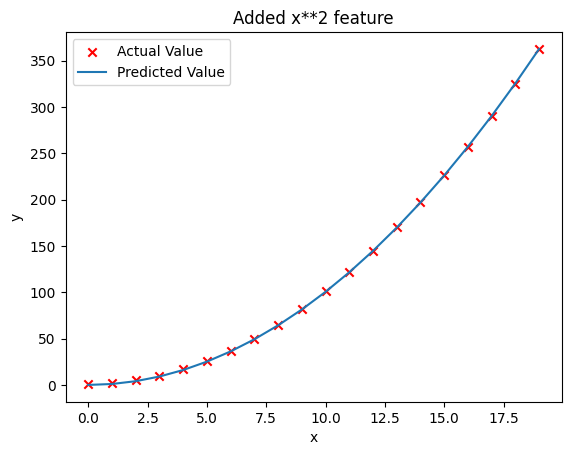

In [ ]:
X = X.reshape(-1, 1)  #X should be a 2-D Matrix
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

In [ ]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

Iteration    0: Cost  1140.29   
Iteration 1000: Cost   328.54   
Iteration 2000: Cost   280.44   
Iteration 3000: Cost   239.39   
Iteration 4000: Cost   204.34   
Iteration 5000: Cost   174.43   
Iteration 6000: Cost   148.90   
Iteration 7000: Cost   127.10   
Iteration 8000: Cost   108.49   
Iteration 9000: Cost    92.61   
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


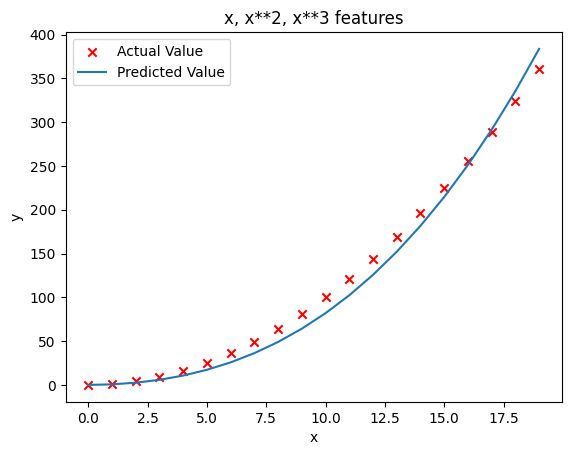

In [ ]:
model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

In [ ]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']

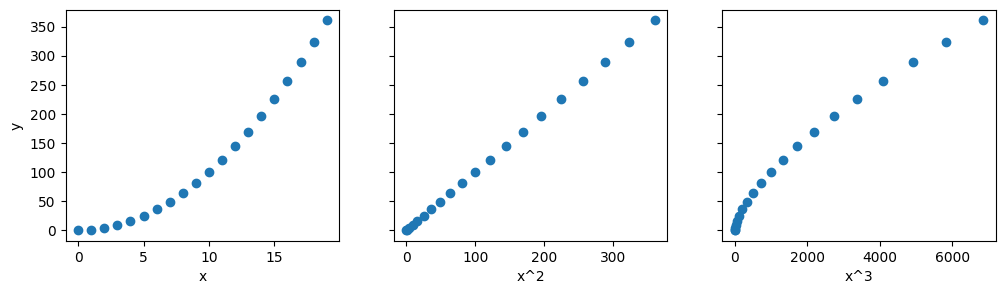

In [ ]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

Iteration    0: Cost  9421.47   
Iteration 10000: Cost     0.39   
Iteration 20000: Cost     0.03   
Iteration 30000: Cost     0.00   
Iteration 40000: Cost     0.00   
Iteration 50000: Cost     0.00   
Iteration 60000: Cost     0.00   
Iteration 70000: Cost     0.00   
Iteration 80000: Cost     0.00   
Iteration 90000: Cost     0.00   
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


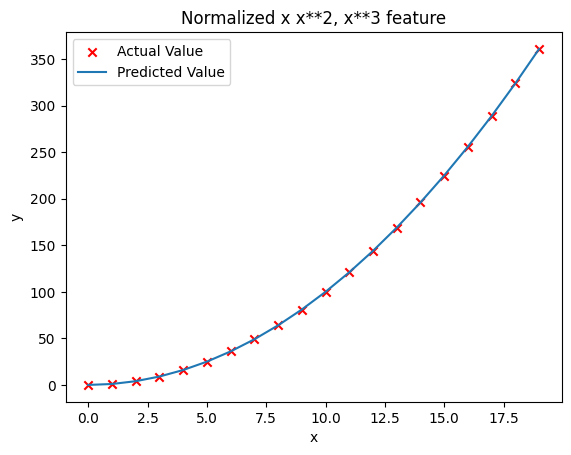

In [ ]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3] # shorthand for column stacking
X_norm, X_mu, X_sigma = zscore_normalize_features(X) # Unpack the tuple
X = X_norm # Assign only the normalized data back to X

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Iteration    0: Cost     0.22   
Iteration 100000: Cost     0.02   
Iteration 200000: Cost     0.02   
Iteration 300000: Cost     0.02   
Iteration 400000: Cost     0.02   
Iteration 500000: Cost     0.02   
Iteration 600000: Cost     0.02   
Iteration 700000: Cost     0.02   
Iteration 800000: Cost     0.02   
Iteration 900000: Cost     0.02   
w,b found by gradient descent: w: [ -1.34 -10.    24.78   5.96 -12.49 -16.26  -9.51   0.59   8.7   11.94
   9.27   0.79 -12.82], b: -0.0073


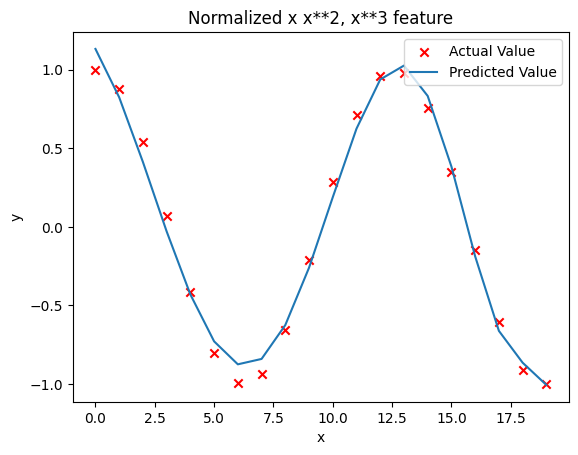

In [ ]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X_norm, X_mu, X_sigma = zscore_normalize_features(X) # Unpack the tuple
X = X_norm # Assign only the normalized data back to X

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

# Scikit-Learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=2)

In [ ]:
# load the dataset
data = np.loadtxt("./houses.txt", delimiter=',', skiprows=1)
#data = np.loadtxt("./houses.txt", delimiter=',', skiprows=0)
X = data[:,:4]  # All rows, columns 0 to 3 (features)
y = data[:,4]   # All rows, column 4 (target variable)
X_train=X
y_train = y

X_features = ['size(sqft)','bedrooms','floors','age']

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


In [ ]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 148, number of weight updates: 14653.0


In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [110.35 -21.16 -32.62 -37.99], b:[363.16]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [ ]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b.
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.23 485.88 389.52 492.04]
Target values 
[300.  509.8 394.  540. ]


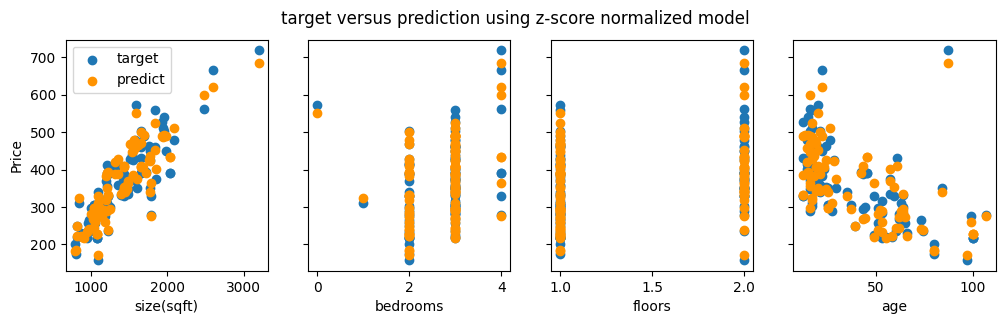

In [ ]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.set_printoptions(precision=2)

In [ ]:
X_train = np.array([1.0, 2.0])   #features
y_train = np.array([300, 500])   #target value

In [ ]:
linear_model = LinearRegression()
#X must be a 2-D Matrix
linear_model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")
print(f"'manual' prediction: f_wb = wx+b : {1200*w + b}")

w = [200.], b = 100.00
'manual' prediction: f_wb = wx+b : [240100.]


In [ ]:
y_pred = linear_model.predict(X_train.reshape(-1, 1))

print("Prediction on training set:", y_pred)

X_test = np.array([[1200]])
print(f"Prediction for 1200 sqft house: INR {linear_model.predict(X_test)[0]:0.2f}")

Prediction on training set: [300. 500.]
Prediction for 1200 sqft house: INR 240100.00


In [ ]:
# load the dataset
data = np.loadtxt("./houses.txt", delimiter=',', skiprows=1)
#data = np.loadtxt("./houses.txt", delimiter=',', skiprows=0)
X = data[:,:4]  # All rows, columns 0 to 3 (features)
y = data[:,4]   # All rows, column 4 (target variable)
X_train=X
y_train = y

X_features = ['size(sqft)','bedrooms','floors','age']

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [  0.27 -32.62 -67.25  -1.47], b = 220.42


In [ ]:
print(f"Prediction on training set:\n {linear_model.predict(X_train)[:4]}" )
print(f"prediction using w,b:\n {(X_train @ w + b)[:4]}")
print(f"Target values \n {y_train[:4]}")

x_house = np.array([1200, 3,1, 40]).reshape(-1,4)
x_house_predict = linear_model.predict(x_house)[0]
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = INR {x_house_predict*1000:0.2f}")

Prediction on training set:
 [295.18 485.98 389.52 492.15]
prediction using w,b:
 [295.18 485.98 389.52 492.15]
Target values 
 [300.  509.8 394.  540. ]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = INR 318709.09


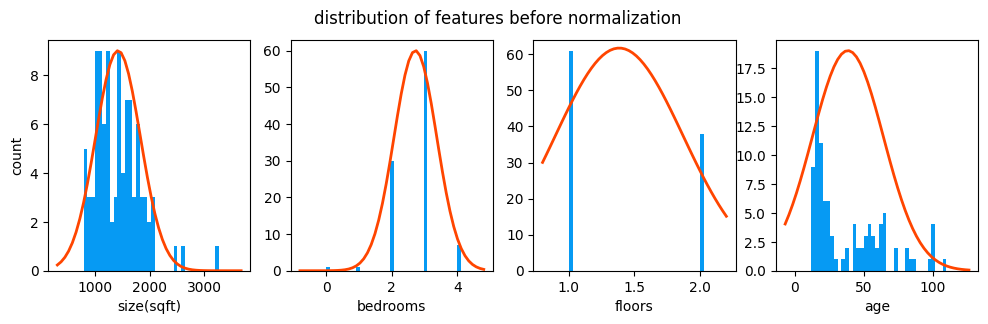

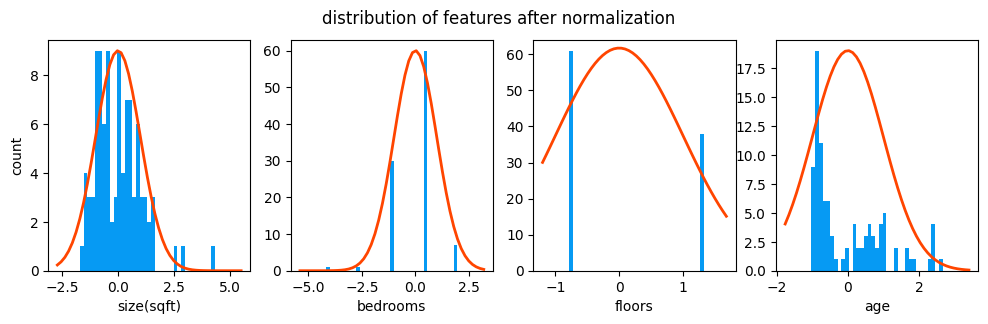

In [ ]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features after normalization")

plt.show()

Iteration    0: Cost  9421.47   
Iteration 10000: Cost     0.39   
Iteration 20000: Cost     0.03   
Iteration 30000: Cost     0.00   
Iteration 40000: Cost     0.00   
Iteration 50000: Cost     0.00   
Iteration 60000: Cost     0.00   
Iteration 70000: Cost     0.00   
Iteration 80000: Cost     0.00   
Iteration 90000: Cost     0.00   
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


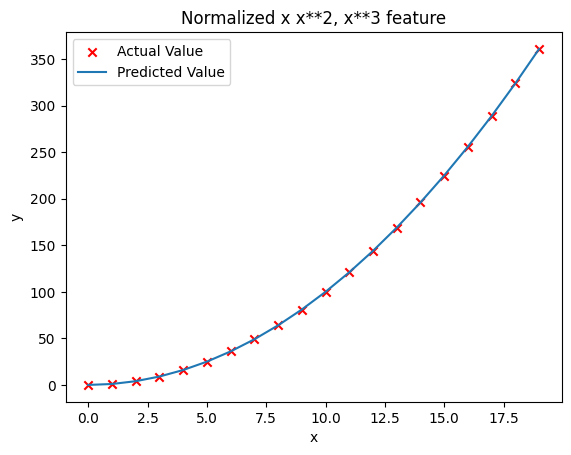